In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [2]:
data = pd.read_csv('group2.csv', sep='\t')
data.head(3)

,ID,Person A,Person B,Person C,Person D,Person E,Person F,Jimena,Weird
0,1000,1.0,1,1,2,2,1,2.0,0.0
1,1001,4.0,4,3,4,1,3,3.0,0.0
2,1002,2.0,1,2,2,3,2,1.0,0.0


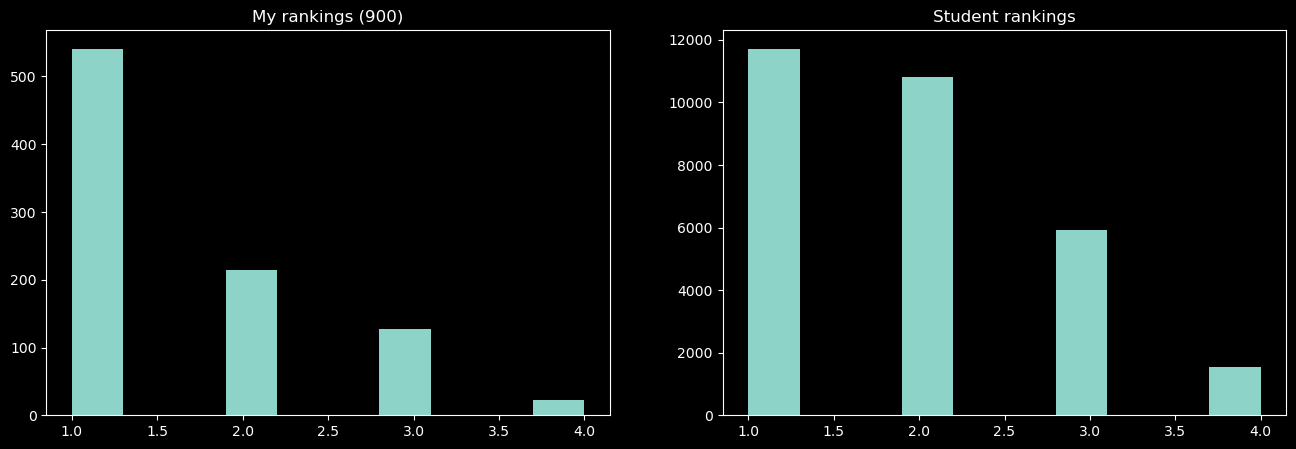

In [3]:
# Distribution of rankings
data_all = pd.DataFrame(columns = data.columns)
all_rank = pd.DataFrame()
for i in range(1, 8):
    if(i == 3): continue
    data = pd.read_csv('group' + str(i) + '.csv', sep='\t')
    data_all = pd.concat((data_all, data), axis=0)
    for name in (data.columns):
        if(len(name) < 8): continue
        all_rank = pd.concat((all_rank, data[name]), axis=0)

all_rank = all_rank.rename(mapper = {0: 'rank'}, axis=1)
all_rank = all_rank.astype({'rank': float})

plt.figure(figsize=(16,5)) 
plt.subplot(1,2,1)
plt.title('My rankings (900)')
plt.hist(data_all['Jimena'])
    
plt.subplot(1,2,2)
plt.title('Student rankings')
plt.hist(all_rank['rank'], range=(1.,4.))
    
plt.show()

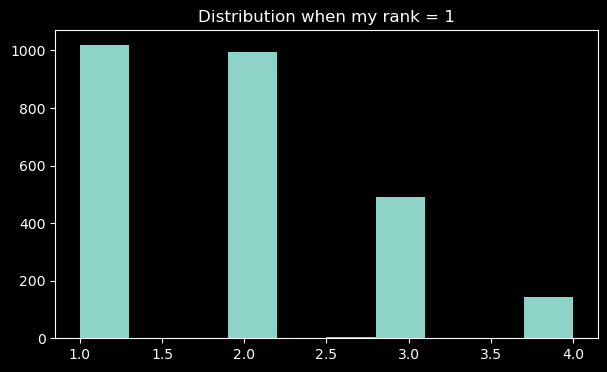

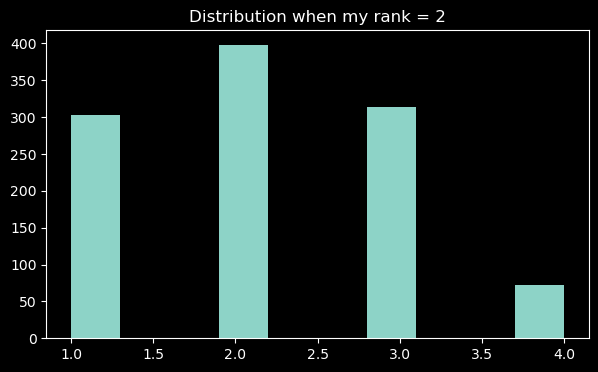

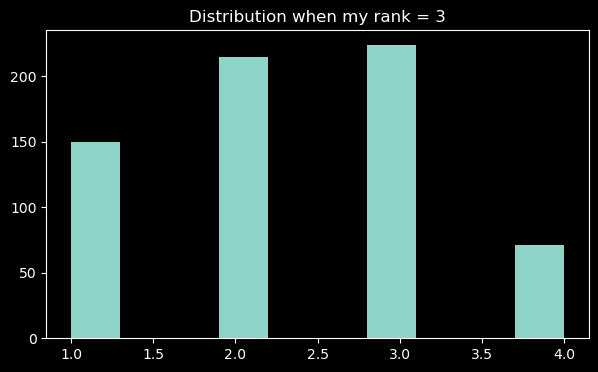

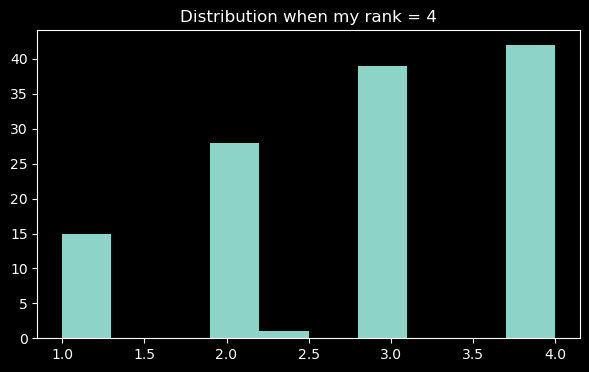

In [4]:
# Distribution for each value of my rankings
list_rank = [[], [], [], []]

for j in range(1, 5):
    for i in range(1, 8):
        if(i == 3): continue
        data = pd.read_csv('group' + str(i) + '.csv', sep='\t')
        data_tmp = data[data['Jimena'] == j]
        for name in (data.columns):
            if(len(name) < 8): continue
            list_rank[j-1] = np.concatenate((list_rank[j-1], data_tmp[name].values), axis=0)
            
    plt.figure(figsize=(7,4))
    plt.title('Distribution when my rank = ' + str(j))
    plt.hist(list_rank[j-1], range=(1,4))
    plt.show()
        

In [5]:
# calculating all classification rates
TPR_list, TNR_list, FPR_list, PUR_list = [], [], [], []
for i in range(1, 8):
    if(i == 3): continue
    data = pd.read_csv('group' + str(i) + '.csv', sep='\t')
    data_pos = data[data['Jimena'] >= 3]
    data_neg = data[data['Jimena'] <= 2]
    for name in (data.columns):
        if(len(name) < 8): continue
        data_pur = data[data[name] >= 4]
        TPR = len(data_pos[data_pos[name] >= 3])/len(data_pos)
        TNR = len(data_neg[data_neg[name] <= 2])/len(data_neg)
        FPR = len(data_neg[data_neg[name] >= 3])/len(data_neg)
        PUR = len(data_pur[data_pur['Jimena'] >= 3])/len(data_pur)
        #print(len(data_pur), len(data_pur[data_pur['Jimena'] >= 3]))
        TPR_list.append(TPR)
        TNR_list.append(TNR)
        FPR_list.append(FPR)
        PUR_list.append(PUR) # Of the ones they gave a 4, which ones I gave a 3 or 4

30


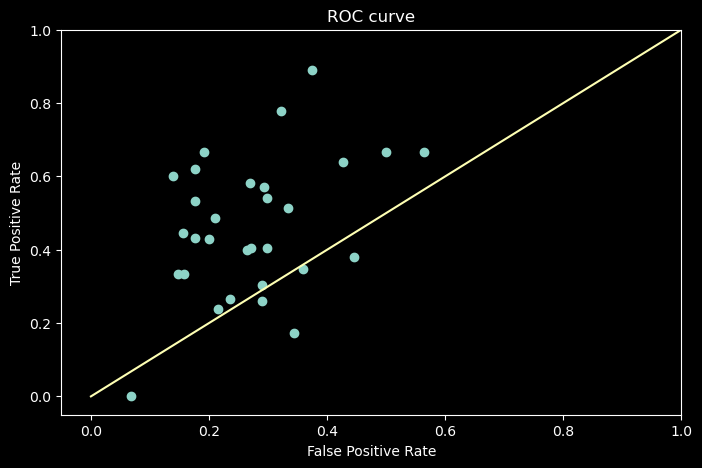

In [6]:
guessing = np.linspace(0, 1 , 10)
print(len(FPR_list))

plt.figure(figsize=(8,5))
plt.title('ROC curve')
plt.xlim(-0.05, 1)
plt.ylim(-0.05, 1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(FPR_list, TPR_list, 'o')
plt.plot(guessing, guessing)
plt.show()

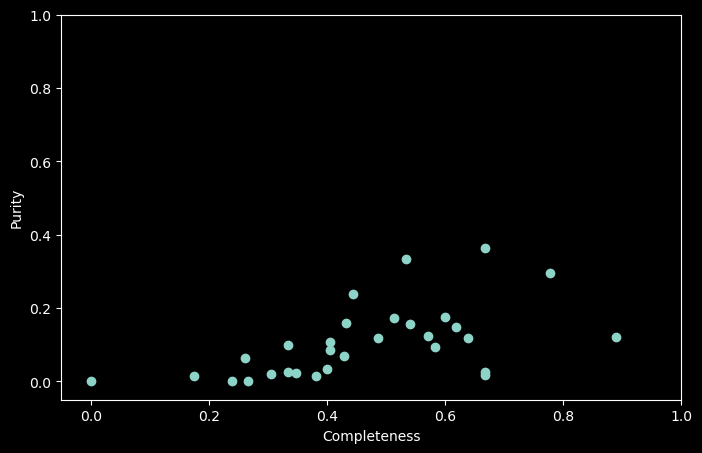

In [7]:
plt.figure(figsize=(8,5))
plt.xlim(-0.05, 1)
plt.ylim(-0.05, 1)
plt.xlabel('Completeness')
plt.ylabel('Purity')
plt.plot(TPR_list, PUR_list, 'o')
plt.show()

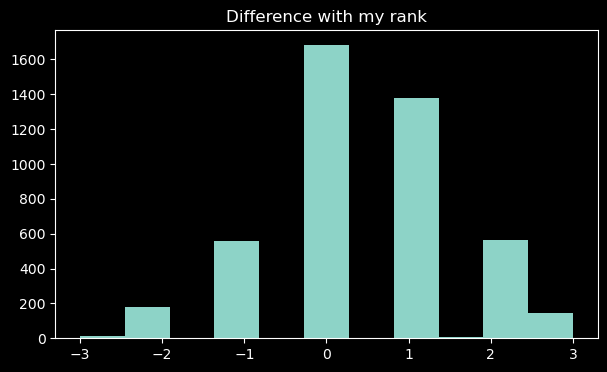

In [8]:
# Difference between their rankings & mine
from collections import Counter
all_dif = []

for i in range(1, 8):
    if(i == 3): continue
    data = pd.read_csv('group' + str(i) + '.csv', sep='\t')
    data = data[data['Jimena'] > 0]
    for name in (data.columns):
        if(len(name) < 8): continue
        dif = data[name] - data['Jimena']
        all_dif = np.concatenate((all_dif, list(dif)) )
        
counted = Counter(all_dif)
plt.figure(figsize=(7,4))
plt.title('Difference with my rank')
plt.hist(all_dif, bins=len(counted))
plt.show()

In [9]:
# Correlation with respect to me: Spearman's Rank correlation coefficient